<a href="https://colab.research.google.com/github/TheMLEngineer/Roster_allocation_project/blob/master/SHIELD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
xls = pd.ExcelFile('/content/drive/My Drive/Project SHIELD/Till August.xlsx')

In [0]:
def read_previous_3months_from_excel(excel_file):
  i = -3
  l = list()
  for j in range(3):
    l.append(pd.read_excel(excel_file , i ))
    i += 1
  return l

In [0]:
l = read_previous_3months_from_excel(xls)

In [0]:
def clean_the_df(list_of_df):
  #Changing col name
  for i in range(3):
    list_of_df[i].columns = list_of_df[i].loc[0]
    list_of_df[i].drop(0 , inplace = True)
    list_of_df[i].set_index('Name' , inplace = True)
    #list_of_df[i] = list_of_df[i].loc[:'Vijay',:]
    
  return list_of_df

In [204]:
clean_the_df(l)

[0              Sat  Sun  Mon  Tue         Wed  ...  Wed  Thu  Fri  Sat  Sun
 Name                                           ...                         
 Karthik S      NaN  NaN    B    B           H  ...    B    B    B  NaN  NaN
 Chitransh        2  NaN    B    B           H  ...    B    B    B  NaN  NaN
 Jasmeet singh  NaN  NaN    C    C           C  ...    B    B    B  NaN  NaN
 Debpriya         1  NaN    B    B           H  ...    B    B    B  NaN  NaN
 Anubhav        NaN  NaN   AL   AL          AL  ...    C    C    C  NaN  NaN
 Jaswant        NaN  NaN    B    B           B  ...    B    B    B  NaN  NaN
 Bishal Roy     NaN    1    A    A           A  ...    A    A    A    1  NaN
 Goutham        NaN  NaN    B    B           H  ...    C    C    C  NaN  NaN
 Mugundan       NaN  NaN    B    B           H  ...    B    B    B  NaN    1
 Vignesh        NaN  NaN    C    C           C  ...    B    B    B    2  NaN
 Karthik M      NaN  NaN    C    C           C  ...    C    C    C  NaN    2

In [0]:
l[0] = l[0].loc[:'Vijay',:]
l[1] = l[1].loc[:'Vijay',:]
l[2] = l[2].loc[:'Vijay',:]

In [0]:
import seaborn as sns

In [207]:
'''def number_of_ABC(list_of_df):
  for i in range(3):
    for j in range(list_of_df[i].shape[0]):
      
    '''

'def number_of_ABC(list_of_df):\n  for i in range(3):\n    for j in range(list_of_df[i].shape[0]):\n      \n    '

In [0]:
def value_count(list_of_df):
  for j in range(3):
    for i in range(list_of_df[j].shape[0]):
      return (list_of_df[j].iloc[i].value_counts())

In [209]:
value_count(l)

B    24
C     5
1     1
2     1
H     1
Name: Karthik S, dtype: int64

In [210]:
for i in range(l[1].shape[0]):
      print(l[1].iloc[i].value_counts())

B     9
C     5
1     3
2     1
SO    1
Name: Karthik S, dtype: int64
B    12
C     3
1     1
Name: Chitransh, dtype: int64
B     13
SO     2
2      1
1      1
Name: Jasmeet singh, dtype: int64
AL    6
SO    5
C     2
B     2
Name: Debpriya, dtype: int64
A    10
B     5
Name: Anubhav, dtype: int64
C     5
B     5
SO    3
AL    2
1     2
Name: Jaswant, dtype: int64
B    10
A     5
1     2
Name: Bishal Roy, dtype: int64
A     9
B     5
2     2
SO    1
Name: Goutham, dtype: int64
C    5
B    5
A    5
2    1
1    1
Name: Mugundan, dtype: int64
C     9
B     5
2     2
AL    1
Name: Vignesh, dtype: int64
B     8
C     5
SO    2
2     1
Name: Karthik M, dtype: int64
C    10
B     5
Name: kShitij, dtype: int64
A    10
B     5
Name: Abhinav, dtype: int64
B    10
A     5
Name: Nilanjana, dtype: int64
B    10
C     5
Name: Shubam, dtype: int64
G    15
Name: Vijay, dtype: int64


In [0]:
d = dict()
for i in range(l[1].shape[0]):
      d[l[1].iloc[i].value_counts().name] = (l[1].iloc[i].value_counts())

In [0]:
previous_work_timings_df = pd.DataFrame(d)

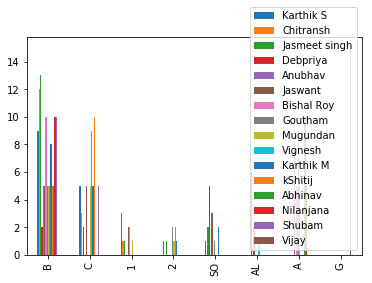

In [213]:
previous_work_timings_df.plot.bar()

In [0]:
#Script for one month Work Timing allocation

In [215]:
previous_work_timings_df.columns

Index(['Karthik S', 'Chitransh', 'Jasmeet singh', 'Debpriya', 'Anubhav',
       'Jaswant', 'Bishal Roy', 'Goutham', 'Mugundan', 'Vignesh', 'Karthik M',
       'kShitij', 'Abhinav', 'Nilanjana', 'Shubam', 'Vijay'],
      dtype='object')

In [216]:
(previous_work_timings_df['Chitransh']).nlargest().iloc[0]

12.0

In [217]:
previous_work_timings_df['Mugundan']['A']

5.0

In [0]:
# a,b,c = [1,2,3]

In [0]:
def get_ABC_list(series):

  return series['A'] , series['B'] , series['C']

In [220]:
get_ABC_list(previous_work_timings_df['Mugundan'])

(5.0, 5.0, 5.0)

In [221]:
temp_df = previous_work_timings_df.loc[['A' , 'B' , 'C']].fillna(0)
temp_df 

,Karthik S,Chitransh,Jasmeet singh,Debpriya,Anubhav,Jaswant,Bishal Roy,Goutham,Mugundan,Vignesh,Karthik M,kShitij,Abhinav,Nilanjana,Shubam,Vijay
A,0.0,0.0,0.0,0.0,10.0,0.0,5.0,9.0,5.0,0.0,0.0,0.0,10.0,5.0,0.0,0.0
B,9.0,12.0,13.0,2.0,5.0,5.0,10.0,5.0,5.0,5.0,8.0,5.0,5.0,10.0,10.0,0.0
C,5.0,3.0,0.0,2.0,0.0,5.0,0.0,0.0,5.0,9.0,5.0,10.0,0.0,0.0,5.0,0.0


In [222]:
list(temp_df.loc[['A' , 'B' , 'C']]['Jaswant'].sort_values().index)[0:2]

['A', 'B']

In [0]:
l = list()
for i in temp_df.columns:
  l.append(list(temp_df.loc[['A' , 'B' , 'C']][i].sort_values().index[0:2]))

In [224]:
l

[['A', 'C'],
 ['A', 'C'],
 ['A', 'C'],
 ['A', 'B'],
 ['C', 'B'],
 ['A', 'B'],
 ['C', 'A'],
 ['C', 'B'],
 ['A', 'B'],
 ['A', 'B'],
 ['A', 'C'],
 ['A', 'B'],
 ['C', 'B'],
 ['C', 'A'],
 ['A', 'C'],
 ['A', 'B']]

In [0]:
from calendar import monthrange
def get_no_of_days_in_a_month(year , month):
  return monthrange(year , month)[1]

In [226]:
get_no_of_days_in_a_month(2019 , 3)

31

In [227]:
#Create DF
month = int(input('Enter the month : '))
year = int(input('Enter the year : '))
days_in_df = get_no_of_days_in_a_month(year , month)

Enter the month : 10
Enter the year : 2019


In [228]:
days_in_df

31

In [0]:
#temp_df

In [230]:
import calendar
calendar.TextCalendar()

In [0]:
df = pd.DataFrame(calendar.monthcalendar(year , month ) , columns = ['Mon' , 'Tue' , 'Wed' , 'Thur' , 'Fri ' , 'Sat' , 'Sun'])

In [232]:
df

,Mon,Tue,Wed,Thur,Fri,Sat,Sun
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,0,0,0


In [0]:
sat = list(df.iloc[:, 5])

In [0]:
sun = list(df.iloc[:, 6])

In [0]:
def get_saturday_and_sunday(month , year):
  df = pd.DataFrame(calendar.monthcalendar(year , month ) , columns = ['Mon' , 'Tue' , 'Wed' , 'Thur' , 'Fri ' , 'Sat' , 'Sun'])
  return list(df.iloc[:, 5]) + list(df.iloc[:, 6])

In [0]:
a = get_saturday_and_sunday(10 , 2019)

In [237]:
np.trim_zeros(a)

[5, 12, 19, 26, 0, 6, 13, 20, 27]

In [238]:
temp_df

,Karthik S,Chitransh,Jasmeet singh,Debpriya,Anubhav,Jaswant,Bishal Roy,Goutham,Mugundan,Vignesh,Karthik M,kShitij,Abhinav,Nilanjana,Shubam,Vijay
A,0.0,0.0,0.0,0.0,10.0,0.0,5.0,9.0,5.0,0.0,0.0,0.0,10.0,5.0,0.0,0.0
B,9.0,12.0,13.0,2.0,5.0,5.0,10.0,5.0,5.0,5.0,8.0,5.0,5.0,10.0,10.0,0.0
C,5.0,3.0,0.0,2.0,0.0,5.0,0.0,0.0,5.0,9.0,5.0,10.0,0.0,0.0,5.0,0.0


In [239]:
days_in_df

31

In [0]:
roster = pd.DataFrame(index = temp_df.columns , columns = list(range(1 , days_in_df + 1)))

In [241]:
roster

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Karthik S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chitransh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jasmeet singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Debpriya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anubhav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jaswant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bishal Roy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goutham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mugundan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vignesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
for i in a:
  roster[i] = 0

In [243]:
roster

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,0
Karthik S,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Chitransh,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Jasmeet singh,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Debpriya,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Anubhav,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Jaswant,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Bishal Roy,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Goutham,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Mugundan,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Vignesh,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0


In [244]:
l

[['A', 'C'],
 ['A', 'C'],
 ['A', 'C'],
 ['A', 'B'],
 ['C', 'B'],
 ['A', 'B'],
 ['C', 'A'],
 ['C', 'B'],
 ['A', 'B'],
 ['A', 'B'],
 ['A', 'C'],
 ['A', 'B'],
 ['C', 'B'],
 ['C', 'A'],
 ['A', 'C'],
 ['A', 'B']]

In [0]:
# l[0][0]

In [0]:
# roster.iloc[0].index

In [0]:
# not_a_number = roster.iloc[0][3]

In [0]:
# roster.iloc[0][roster.iloc[0] != 0] = 'B'

In [249]:
len(roster.iloc[0])

32

In [250]:
len(roster.iloc[0]) / 2

16.0

In [251]:
'''a = roster.iloc[0][:int(len((roster.iloc[0])) / 2)]
#np.where(a==0 , a , 'B')
a.where(a ==  0 , 'B')'''

"a = roster.iloc[0][:int(len((roster.iloc[0])) / 2)]\n#np.where(a==0 , a , 'B')\na.where(a ==  0 , 'B')"

In [0]:
#a

In [0]:
#roster.iloc[0][int(len((roster.iloc[0])) / 2):]

### ***Shift Roster Allocation***

In [0]:
# Shift allocating 
def series_split(series):
  return series[:int(len(series) / 2)] , series[int(len(series) / 2):]

In [0]:
def series_value_assign(s1 , s2 , l1):
  s1 = s1.where(s1 == 0 , l1[0])
  s2 = s2.where(s2 == 0 , l1[1])
  return s1.append(s2)

In [256]:
roster.iloc[0]

1     NaN
2     NaN
3     NaN
4     NaN
5       0
6       0
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12      0
13      0
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19      0
20      0
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26      0
27      0
28    NaN
29    NaN
30    NaN
31    NaN
0       0
Name: Karthik S, dtype: object

In [257]:
roster

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,0
Karthik S,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Chitransh,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Jasmeet singh,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Debpriya,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Anubhav,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Jaswant,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Bishal Roy,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Goutham,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Mugundan,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0
Vignesh,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0


In [258]:
'''def karthik_s():
  splitted_series = series_split(roster.iloc[0])

  return series_value_assign(splitted_series , ['B','B'])'''

"def karthik_s():\n  splitted_series = series_split(roster.iloc[0])\n\n  return series_value_assign(splitted_series , ['B','B'])"

In [0]:
#Karthik_s
roster.iloc[0] = roster.iloc[0].where(roster.iloc[0] ==0 , 'B' )

In [0]:
#Chitransh
roster.iloc[1] = roster.iloc[1].where(roster.iloc[1] ==0 , 'B' )

In [0]:
#Vijay
roster.iloc[-1] = roster.iloc[-1].where(roster.iloc[-1] ==0 , 'B' )

In [0]:
roster.drop(['Jasmeet singh' , 'Debpriya'] , inplace=True)

In [0]:
del l[2:4]

In [0]:
#Anubhav
a , b = series_split(roster.iloc[2])
roster.iloc[2] = series_value_assign(a , b , l[2])

In [0]:
#Jaswanth
a , b = series_split(roster.iloc[3])
roster.iloc[3] = series_value_assign(a , b , l[3])

In [0]:
#Bishal Roy
a , b = series_split(roster.iloc[4])
roster.iloc[4] = series_value_assign(a , b , l[4])

In [0]:
#Goutham
a , b = series_split(roster.iloc[5])
roster.iloc[5] = series_value_assign(a , b , l[5])

In [0]:
#Mugundan
a , b = series_split(roster.iloc[6])
roster.iloc[6] = series_value_assign(a , b , l[6])

In [0]:
#Vignesh
a , b = series_split(roster.iloc[7])
roster.iloc[7] = series_value_assign(a , b , l[7])

In [0]:
#Karthik M
a , b = series_split(roster.iloc[8])
roster.iloc[8] = series_value_assign(a , b , l[8])

In [0]:
#kShitij
a , b = series_split(roster.iloc[9])
roster.iloc[9] = series_value_assign(a , b , l[9])

In [0]:
#Abhinav
a , b = series_split(roster.iloc[10])
roster.iloc[10] = series_value_assign(a , b , l[10])

In [0]:
#Nilanjana
a , b = series_split(roster.iloc[11])
roster.iloc[11] = series_value_assign(a , b , l[11])

In [0]:
#Shubam
a , b = series_split(roster.iloc[-2])
roster.iloc[-2] = series_value_assign(a , b , l[-2])

In [0]:
roster.drop(roster[0] , axis = 1 , inplace=True)

In [276]:
roster

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Karthik S,B,B,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B
Chitransh,B,B,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B
Anubhav,C,C,C,C,0,0,C,C,C,C,C,0,0,C,C,C,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B
Jaswant,A,A,A,A,0,0,A,A,A,A,A,0,0,A,A,A,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B
Bishal Roy,C,C,C,C,0,0,C,C,C,C,C,0,0,C,C,C,A,A,0,0,A,A,A,A,A,0,0,A,A,A,A
Goutham,C,C,C,C,0,0,C,C,C,C,C,0,0,C,C,C,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B
Mugundan,A,A,A,A,0,0,A,A,A,A,A,0,0,A,A,A,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B
Vignesh,A,A,A,A,0,0,A,A,A,A,A,0,0,A,A,A,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B
Karthik M,A,A,A,A,0,0,A,A,A,A,A,0,0,A,A,A,C,C,0,0,C,C,C,C,C,0,0,C,C,C,C
kShitij,A,A,A,A,0,0,A,A,A,A,A,0,0,A,A,A,B,B,0,0,B,B,B,B,B,0,0,B,B,B,B


In [277]:
roster.shape

(14, 31)

In [0]:
roster.replace({0 : np.nan} , inplace=True)

In [279]:
roster

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Karthik S,B,B,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B
Chitransh,B,B,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B
Anubhav,C,C,C,C,NaN,NaN,C,C,C,C,C,NaN,NaN,C,C,C,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B
Jaswant,A,A,A,A,NaN,NaN,A,A,A,A,A,NaN,NaN,A,A,A,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B
Bishal Roy,C,C,C,C,NaN,NaN,C,C,C,C,C,NaN,NaN,C,C,C,A,A,NaN,NaN,A,A,A,A,A,NaN,NaN,A,A,A,A
Goutham,C,C,C,C,NaN,NaN,C,C,C,C,C,NaN,NaN,C,C,C,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B
Mugundan,A,A,A,A,NaN,NaN,A,A,A,A,A,NaN,NaN,A,A,A,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B
Vignesh,A,A,A,A,NaN,NaN,A,A,A,A,A,NaN,NaN,A,A,A,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B
Karthik M,A,A,A,A,NaN,NaN,A,A,A,A,A,NaN,NaN,A,A,A,C,C,NaN,NaN,C,C,C,C,C,NaN,NaN,C,C,C,C
kShitij,A,A,A,A,NaN,NaN,A,A,A,A,A,NaN,NaN,A,A,A,B,B,NaN,NaN,B,B,B,B,B,NaN,NaN,B,B,B,B


In [0]:
roster.to_excel('Shift_roster.xlsx')

In [0]:
#l[0]

In [281]:
'''def allocator_fn(series , l_no):
  counter = 0 
  for i in series:
    print('-------------------->',i)
    j = 0
    if i == t:
      i = l[l_no][0]
      counter += 1
      print('#############################',i)
      if counter >=10:
        i = l[l_no][1]
  
  return series'''

"def allocator_fn(series , l_no):\n  counter = 0 \n  for i in series:\n    print('-------------------->',i)\n    j = 0\n    if i == t:\n      i = l[l_no][0]\n      counter += 1\n      print('#############################',i)\n      if counter >=10:\n        i = l[l_no][1]\n  \n  return series"

In [0]:
#allocator_fn(roster.loc['Karthik S'] , 0)

In [0]:
#t = roster.loc['Karthik S'][3]

In [284]:
'''for i in roster.loc['Karthik S']:
  print(i)'''

"for i in roster.loc['Karthik S']:\n  print(i)"

In [0]:
#pd.melt(test_df)

In [0]:
#final_df = pd.DataFrame(test_df.unstack().dropna())

In [0]:
#employee_list = final_df.index.levels[0]

In [288]:
'''from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
final_df.plot.bar()
plt.xticks(employee_list ,  rotation = 90)'''

"from matplotlib.pyplot import figure\nfigure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')\nfinal_df.plot.bar()\nplt.xticks(employee_list ,  rotation = 90)"

In [289]:
'''#df_final = pd.DataFrame()
for i in value_df['Hi']:
  print(df_final.concat(i))'''

"#df_final = pd.DataFrame()\nfor i in value_df['Hi']:\n  print(df_final.concat(i))"

In [0]:
#value_df.index

In [291]:
'''January = pd.read_excel(xls , -3)
January.head()'''

'January = pd.read_excel(xls , -3)\nJanuary.head()'

In [292]:
'''Feburary = pd.read_excel(xls , 'Feburary')
Feburary.head()'''

"Feburary = pd.read_excel(xls , 'Feburary')\nFeburary.head()"